In [1]:
%%capture
!pip install -q transformers
!pip install torch
!pip uninstall opencv-python
!pip install opencv-python-headless

In [3]:
import sys
import requests
from PIL import Image
import numpy as np
import torch
import cv2
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import boto3
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import numpy as np
import json
import base64
from PIL import Image
from io import BytesIO

In [4]:
sys.path.append('/root/gucci-tutorial/modules')
print(sys.path)

['/root/gucci-tutorial', '/opt/conda/lib/python310.zip', '/opt/conda/lib/python3.10', '/opt/conda/lib/python3.10/lib-dynload', '', '/opt/conda/lib/python3.10/site-packages', '/opt/conda/lib/python3.10/site-packages/PyQt5_sip-12.11.0-py3.10-linux-x86_64.egg', '/opt/conda/lib/python3.10/site-packages/PyYAML-6.0-py3.10-linux-x86_64.egg', '/root/gucci-tutorial/modules']


In [5]:
from modules import classes
from classes import masking, diffusion_model

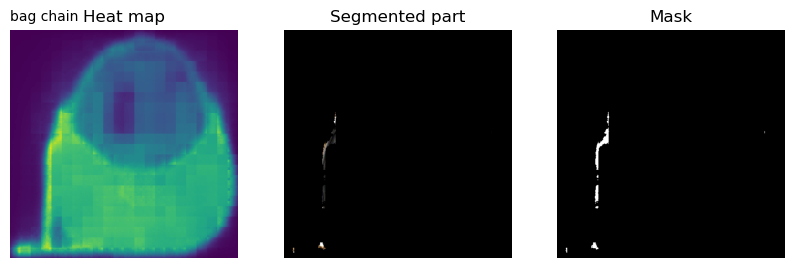

In [7]:
m = masking()
m.load_image('img_1.jpg')
m.pass_prompts(['bag'])
m.create_masks()
m.plot_images()
m.save_fig('/root/gucci-tutorial')

In [15]:
model = diffusion_model()
model.encoded_input_image('/root/gucci-tutorial/img_1.jpg')
model.encoded_mask_image('/root/gucci-tutorial/bag.jpg')
encoded_input_image = model.encoded_input
encoded_mask_image = model.encoded_mask

In [19]:
payload = { 
    "prompt":"gucci bag with logo",
    "image":encoded_input_image, 
    "mask_image":encoded_mask_image, 
    "num_inference_steps":70,
    "guidance_scale":7,
    "num_images_per_prompt":4,
    "seed": 1,
    "batch_size":2
}

In [20]:
model.query_endpoint(payload)

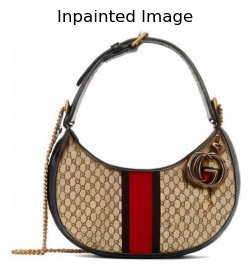

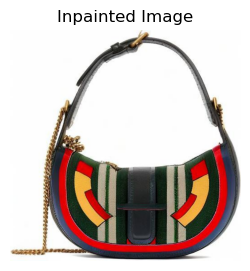

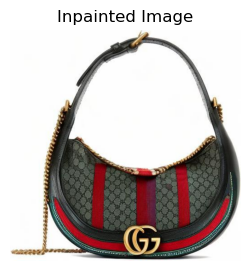

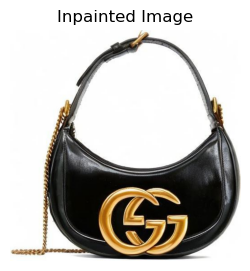

In [21]:
model.parse_and_display_response()